# **Predictive Analytics : Water Quality**

## **Deskripsi Proyek**

Proyek ini bertujuan untuk mengembangkan model klasifikasi menggunakan algoritma machine learning untuk menilai apakah air layak minum (potable) atau tidak berdasarkan parameter fisik dan kimia seperti pH, kadar chloramines, sulfate, turbidity, dan lainnya.

Adapun tahapan dalam pengembangan proyek sebagai berikut :  


1.   Data Understanding
2.   Data Preparation
3.   Model Development
4.   Evaluation


## Import Library

Sebelum memulai tahapan-tahapan dalam pengembangan proyek, alangkah baiknya kita melakukan import library terlebih dahulu agar dapat dengan mudah mengelola library-library yang akan digunakan dalam tahapan pengembangan proyek.

In [29]:
# Import & Install Library for Data Understanding
!pip install -q kaggle
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Import Library for Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import Library for Model Development
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import Library for Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## **1. Data Understanding**

Data Understanding adalah tahapan untuk memahami struktur, karakteristik, dan kualitas data. Dalam tahap ini, dilakukan eksplorasi awal untuk melihat nilai-nilai yang hilang, distribusi fitur, korelasi antar variabel, serta potensi masalah dalam data. Tujuannya adalah memastikan bahwa data yang tersedia cocok untuk digunakan dalam pembuatan model machine learning.

Pada Data Understanding terdapat beberapa tahapan, sebagai berikut :
  - Data loading
  - Exploratory Data Analysis

### **1.1 Data Loading**

Data loading adalah tahap awal dalam proyek machine learning, yaitu proses memasukkan dataset ke dalam proyek agar dapat digunakan untuk analisis dan pelatihan model.

Pada proyek ini, dataset yang digunakan adalah Water Quality Dataset yang tersedia secara publik di platform Kaggle. Dataset tersebut dapat diakses melalui tautan berikut:
🔗 https://www.kaggle.com/datasets/adityakadiwal/water-potability/data

Karena dataset yang akan digunakan bersumber dari platform Kaggle, kita perlu mengunduhnya terlebih dahulu menggunakan akun Kaggle dan API key. Berikut langkah-langkah yang perlu dilakukan:

- Upload File kaggle.json

    File ini berisi API credentials yang dapat diunduh dari halaman akun Kaggle (di bagian Account > Create API Token).

In [ ]:
# Upload File kaggle.json
files.upload()

- Konfigurasi Credential Kaggle di Environment

  Setelah file diunggah, kita perlu memindahkan file kaggle.json ke direktori yang dikenali oleh Kaggle CLI, lalu atur izin aksesnya:

In [3]:
# Konfigurasi Credential
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

- Unduh Dataset Water Quality

    Setelah konfigurasi selesai, kita bisa langsung mengunduh dataset melalui platform Kaggle

In [4]:
# Unduh dataset Water Quality
!kaggle datasets download -d adityakadiwal/water-potability

Dataset URL: https://www.kaggle.com/datasets/adityakadiwal/water-potability
License(s): CC0-1.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 569MB/s]


Setelah dataset terunduh, kita perlu Mengekstrak file ZIP hasil unduhan dari Kaggle.

In [5]:
# Extract zip hasil unduhan
zip_ref = zipfile.ZipFile('/content/water-potability.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Dengan ini, dataset sudah berhasil diekstrak dan siap digunakan untuk proses data loading dan analisis.

In [6]:
# Load dataset water_potability.csv ke DataFrame df
df = pd.read_csv('/content/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Output kode di atas memberikan informasi sebagai berikut:

- Ada 3275 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 10 kolom yaitu: `ph`,	`Hardness`,	`Solids`,	`Chloramines`, `Sulfate`,	`Conductivity`, `Organic_carbon`, `Trihalomethanes`, `Turbidity`, `Potability`

### **1.2 Exploratory Data Analysis**

**Exploratory Data Analysis** atau sering disingkat EDA merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi

Dalam Exploratory Data Analysis, terdapat beberapa tahapan seperti berikut :
- Exploratory Data Analysis - Deskripsi Variabel
- Exploratory Data Analysis - Menangani Missing Value dan Outliers
- Exploratory Data Analysis - Univariate Analysis
- Exploratory Data Analysis - Multivariate Analysis

#### 1.2.1 Explatory Data Analysis - Deskripsi Variabel

In [7]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Berdasarkan informasi dari Kaggle, variabel-variabel pada Water Quality dataset adalah sebagai berikut:

- `pH` : Menunjukkan tingkat keasaman atau kebasaan air. Rentang ideal menurut WHO adalah 6.5–8.5.

- `Hardness` : Tingkat kekerasan air yang disebabkan oleh kandungan kalsium dan magnesium.

- `Solids` : Total zat padat terlarut (TDS) dalam air yang menunjukkan tingkat mineralisasi.

- `Chloramines` : Senyawa disinfektan hasil reaksi klorin dengan amonia yang digunakan untuk sterilisasi air.

- `Sulfate` : Kandungan sulfat yang berasal dari bahan mineral alami dan industri kimia.

- `Conductivity` : Kemampuan air menghantarkan listrik, bergantung pada jumlah ion terlarut.

- `Organic_carbon` : Total karbon organik yang berasal dari bahan alami yang membusuk atau sumber sintetis.

- `Trihalomethanes` : Produk sampingan disinfeksi yang terbentuk saat klorin bereaksi dengan bahan organik.

- `Turbidity` : Ukuran kejernihan air berdasarkan jumlah partikel tersuspensi.

- `Potability` : Label kelayakan konsumsi. 1 untuk layak minum, 0 untuk tidak layak.

In [8]:
# Menampilkan deskripsi statistik
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

#### 1.2.2 Explatory Data Analysis - Menangani Missing Value dan Outliers

In [9]:
# Mengecek missing values
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Dapat dilihat dari output diatas, terdapat 3 kolom yang memiliki Missing Values. Diantaranya adalah **491 pada kolom `ph`**, **781 pada kolom `Sulfate`**, dan **162 pada kolom `Trihalomethanes`**

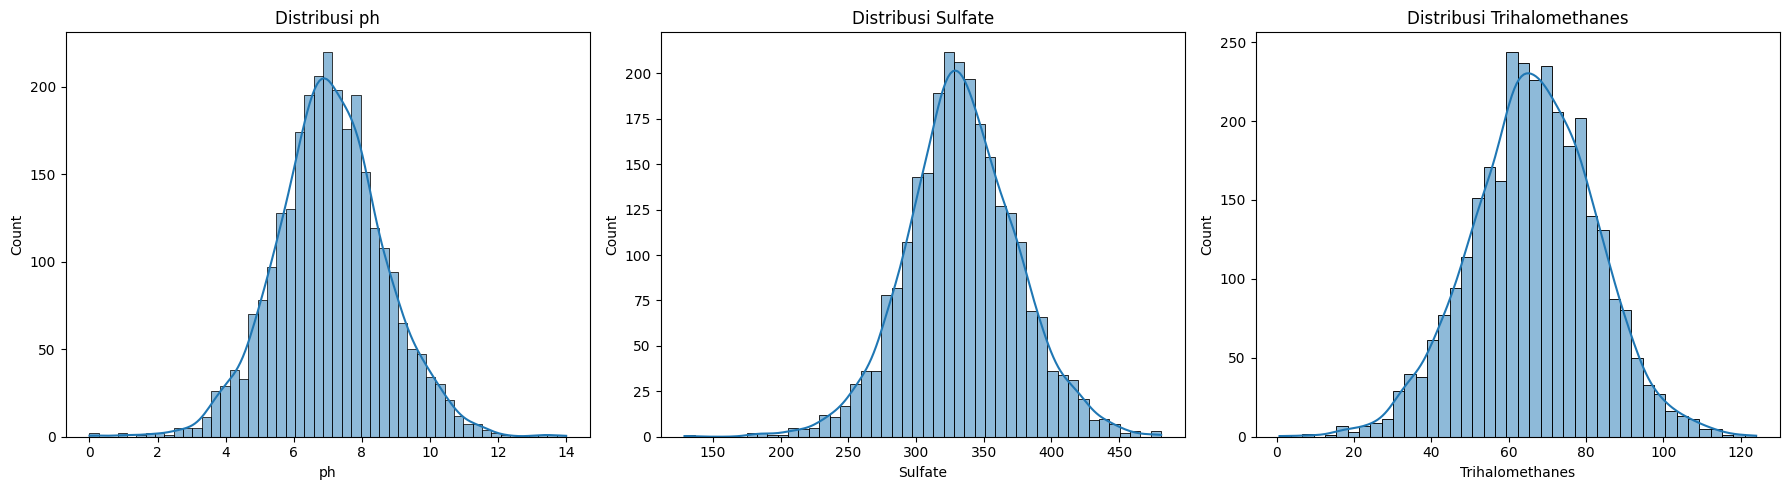

In [10]:
# Cek distribusi kolom yang memiliki missing values
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
missing_columns = ['ph', 'Sulfate', 'Trihalomethanes']

for ax, col in zip(axes, missing_columns):
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi distribusi di atas, kolom `ph` dan `Sulfate` menunjukkan pola distribusi yang simetris, sementara kolom `Trihalomethanes` terlihat sedikit skewed. Oleh karena itu, untuk menangani missing values, kita akan menggunakan nilai rata-rata (mean) pada ph dan Sulfate, karena cocok untuk distribusi simetris, dan menggunakan nilai tengah (median) pada Trihalomethanes karena lebih robust terhadap outlier

In [11]:
# Menangani missing values menggunakan mean pada distribusi simetris
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())

# Menangani missing values menggunakan median pada distribusi skewed
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

Setelah proses penanganan missing values, kita bisa mengecek kembali untuk memastikan bahwa ketiga kolom tersebut sudah bersih dan tidak lagi mengandung data yang hilang

In [12]:
# Mengecek kembali missing values
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


Langkah selanjutnya, kita akan menangani outlier dalam data. Sebagai permulaan, mari kita lihat terlebih dahulu visualisasi outliernya

In [13]:
# Daftar fitur Numerical dan Categorical
numerical_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
categorical_features = ['Potability']

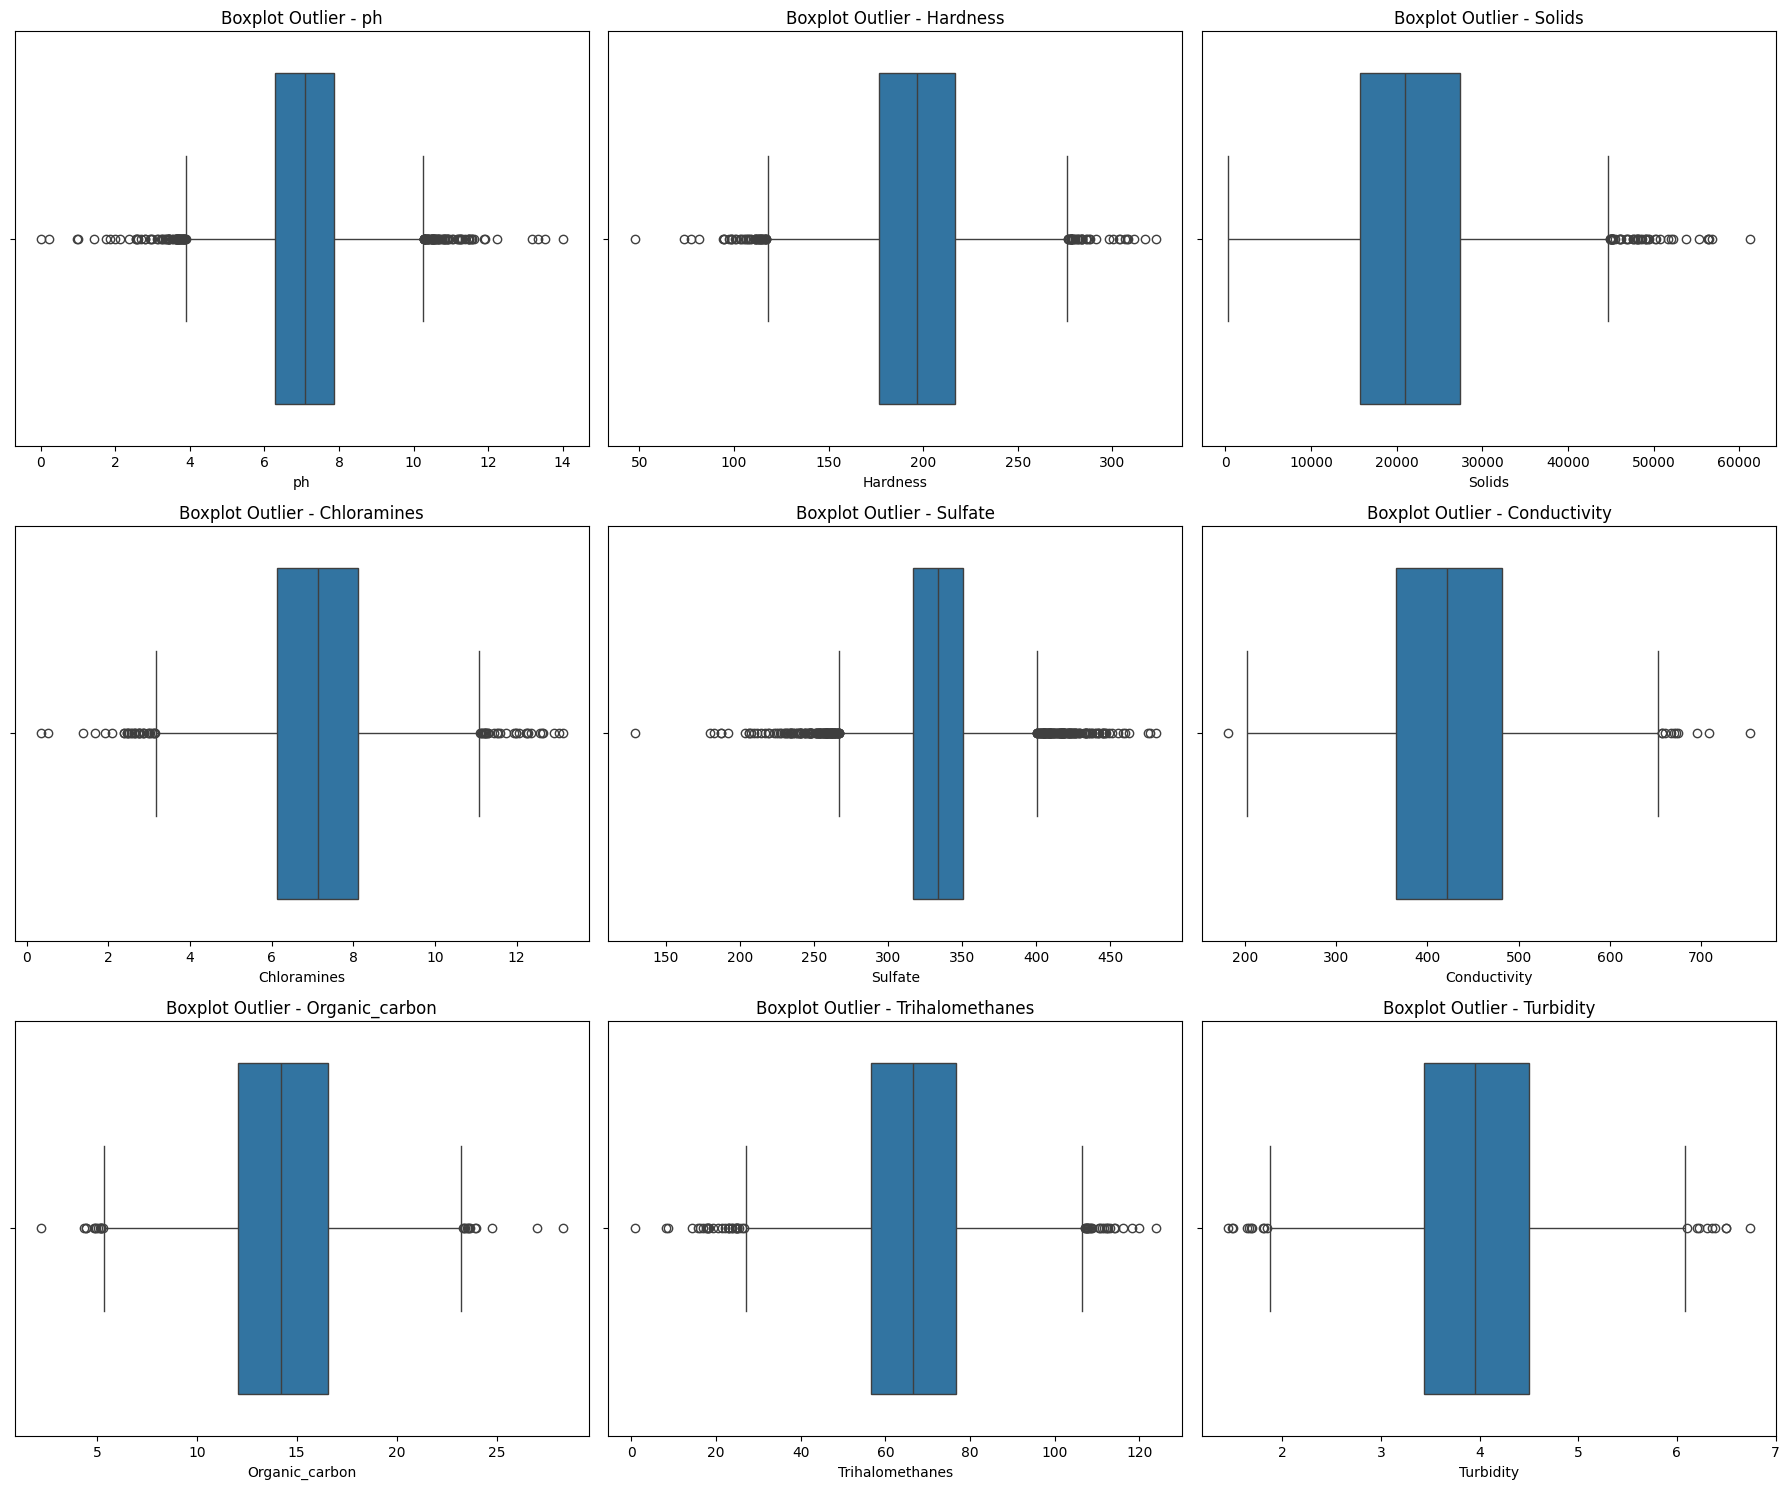

In [14]:
# Cek visualisasi outliers
n_cols = 3
n_rows = -(-len(numerical_features) // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 5 * n_rows))

axes = axes.flatten()

# Loop semua kolom numerik dan buat boxplot
for ax, col in zip(axes, numerical_features):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot Outlier - {col}')
    ax.set_xlabel(col)

# Sembunyikan subplot kosong jika ada
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Dalam proyek ini, kita metode KMeans Clustering digunakan untuk mengidentifikasi dan menghapus outlier. Penggunaan KMeans Clustering sebagai metode deteksi outlier memberikan pendekatan yang adaptif, multivariat, dan bebas asumsi distribusi. Dalam penelitian ini, metode ini dipilih untuk menjaga kualitas data yang digunakan dalam proses pelatihan model klasifikasi potabilitas air, dengan cara menyaring hanya data yang termasuk dalam cluster mayoritas yang dianggap representatif.

In [15]:
# KMeansClustering - menghapus outlier
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_
df = df[labels == labels.max()]
df.reset_index(inplace = True)
df.shape

(1248, 11)

Setelah menangani Outlier, Dataset sekarang telah bersih dan memiliki 1248 sampel.

### 1.2.3 Exploratory Data Analysis - Univariate Analysis

**Categorical Features**

            jumlah sampel  persentase
Potability                           
0                     746        59.8
1                     502        40.2


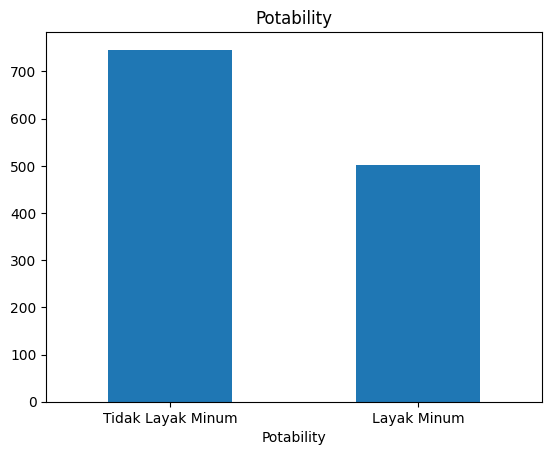

In [16]:
# Melihat distribusi kolom potability
count = df['Potability'].value_counts()
percent = 100 * df['Potability'].value_counts(normalize=True)

df_categorical = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_categorical)

count.index = count.index.map({0: 'Tidak Layak Minum', 1: 'Layak Minum'})
count.plot(kind='bar', title='Potability');
plt.xticks(rotation=0)
plt.show()

Kolom Potability merupakan fitur kategorikal biner yang menunjukkan kelayakan air untuk diminum. Nilai 0 berarti air tidak layak diminum, sementara nilai 1 berarti air layak diminum. Dari grafik di atas, dapat kita lihat bahwa potability 0 (Tidak Layak Minum) memiliki distribusi lebih banyak ketimbang potability 1 (Layak Minum)

**Numerical Features**

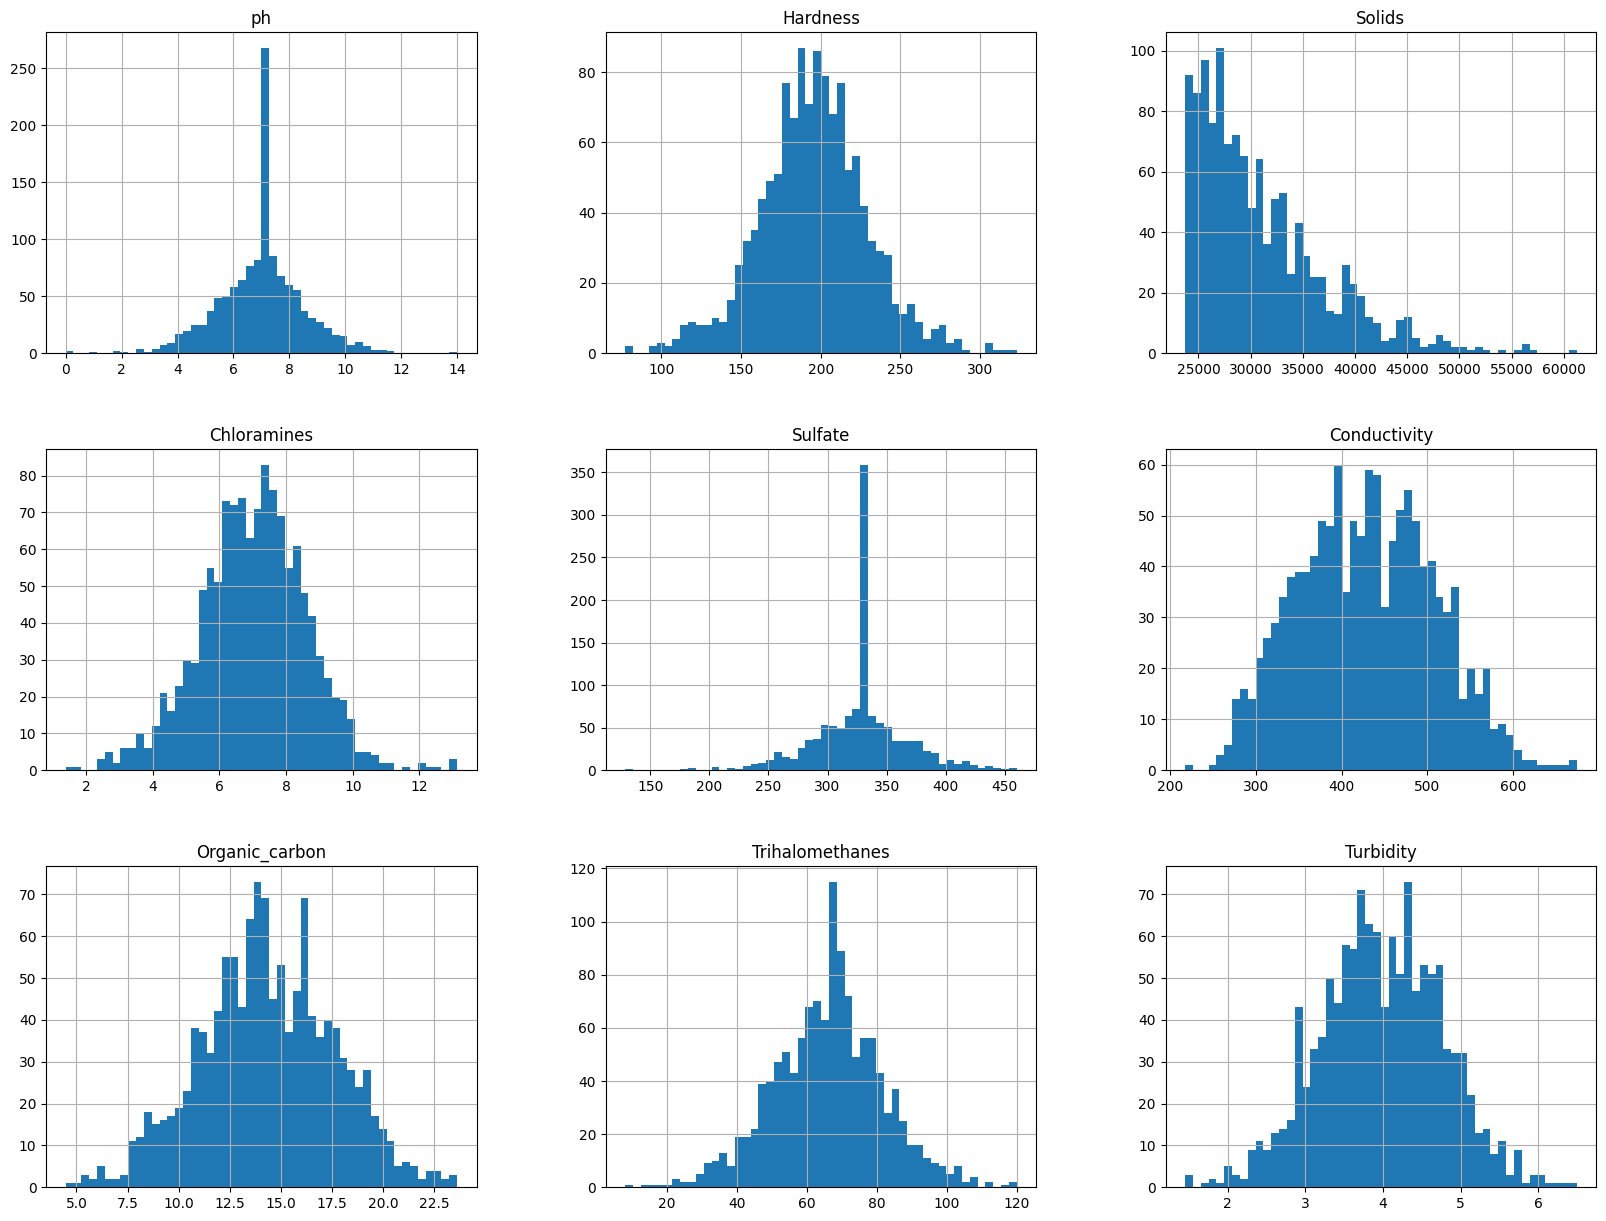

In [17]:
# Melihat distribusi numerical features
df[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

### 1.2.4 Exploratory Data Analysis - Multivariate Analysis

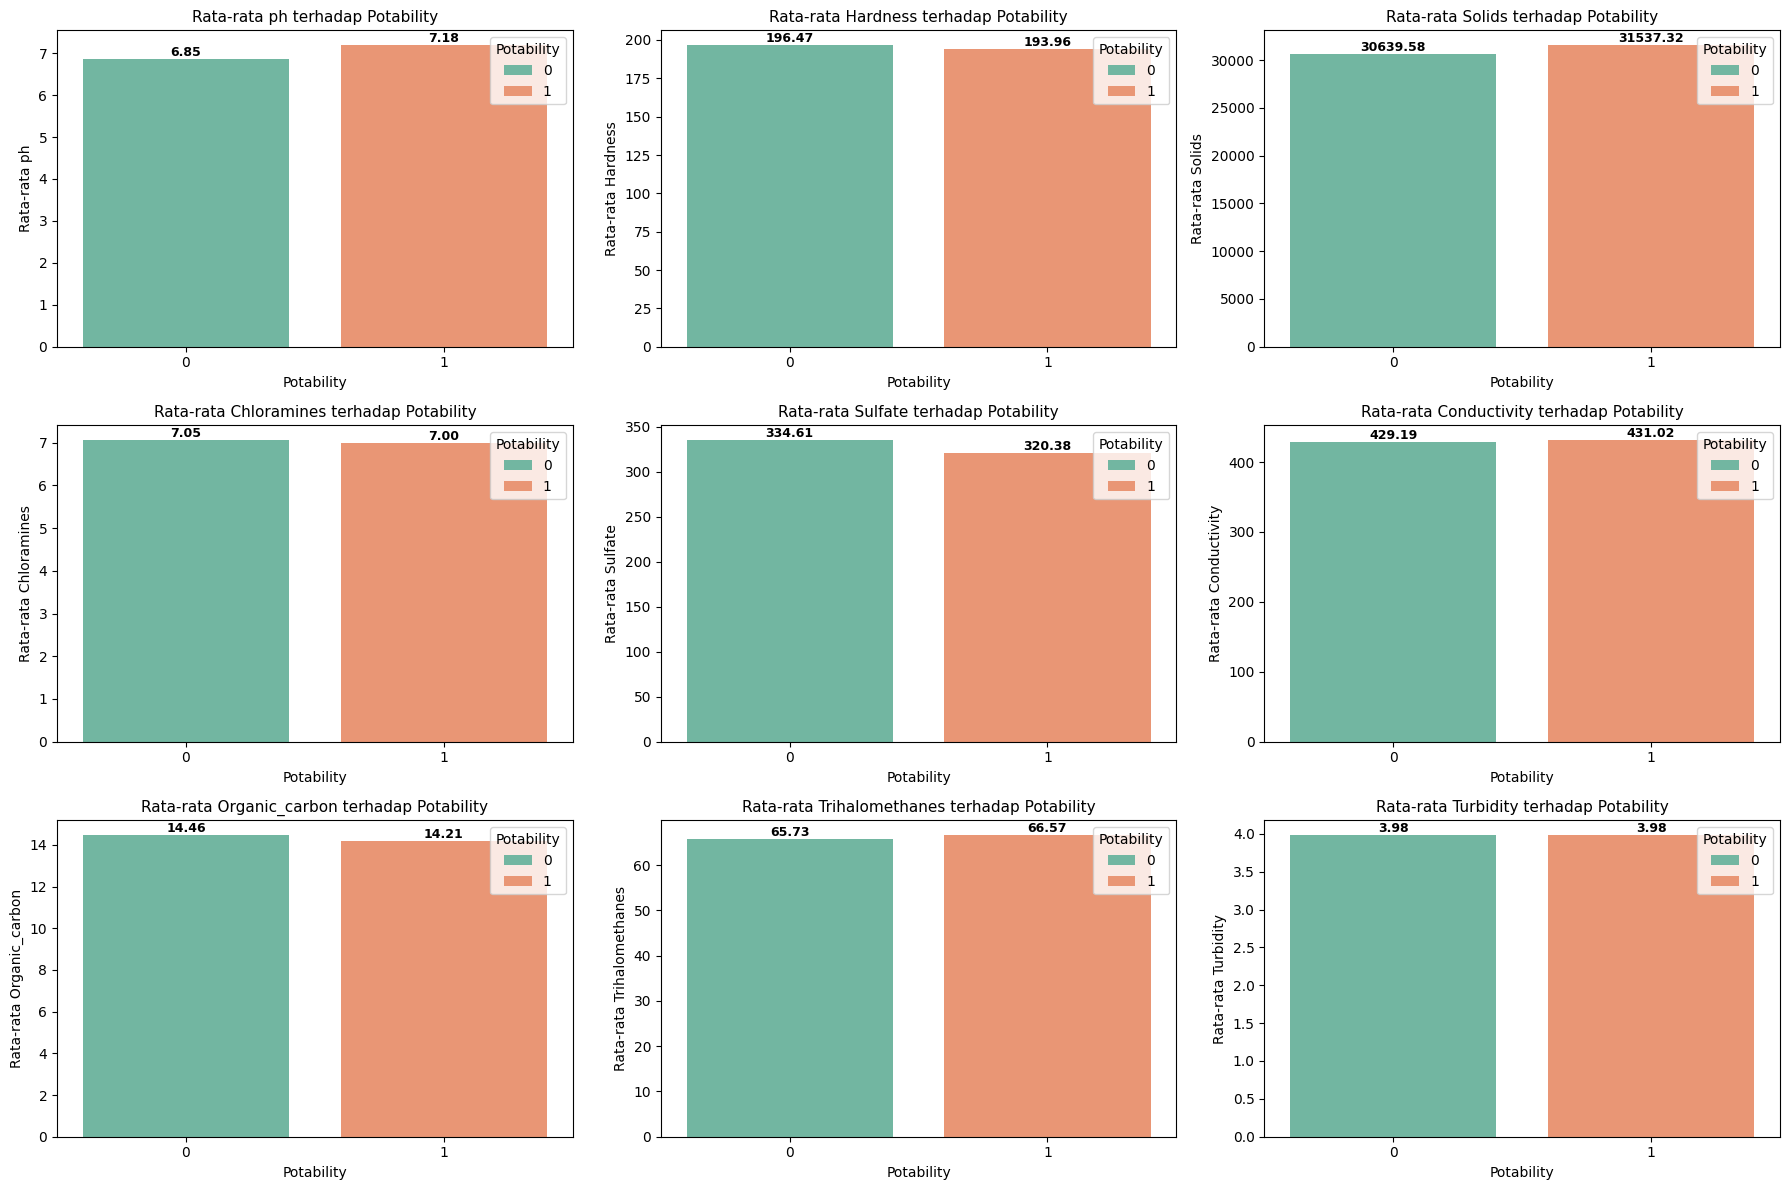

In [18]:
# Visualisasi rata-rata fitur terhadap fitur target
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for ax, col in zip(axes, numerical_features):
    sns.barplot(data=df, x='Potability', y=col, ax=ax, palette='Set2', errorbar=None, hue='Potability')

    # Menambahkan nilai rata-rata ke atas bar
    means = df.groupby('Potability')[col].mean()
    for i, mean in enumerate(means):
        ax.text(i, mean + 0.01 * mean, f'{mean:.2f}', ha='center', fontsize=9, fontweight='bold')

    ax.set_title(f"Rata-rata {col} terhadap Potability", fontsize=11)
    ax.set_xlabel('Potability')
    ax.set_ylabel(f'Rata-rata {col}')

# Hapus subplot kosong
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

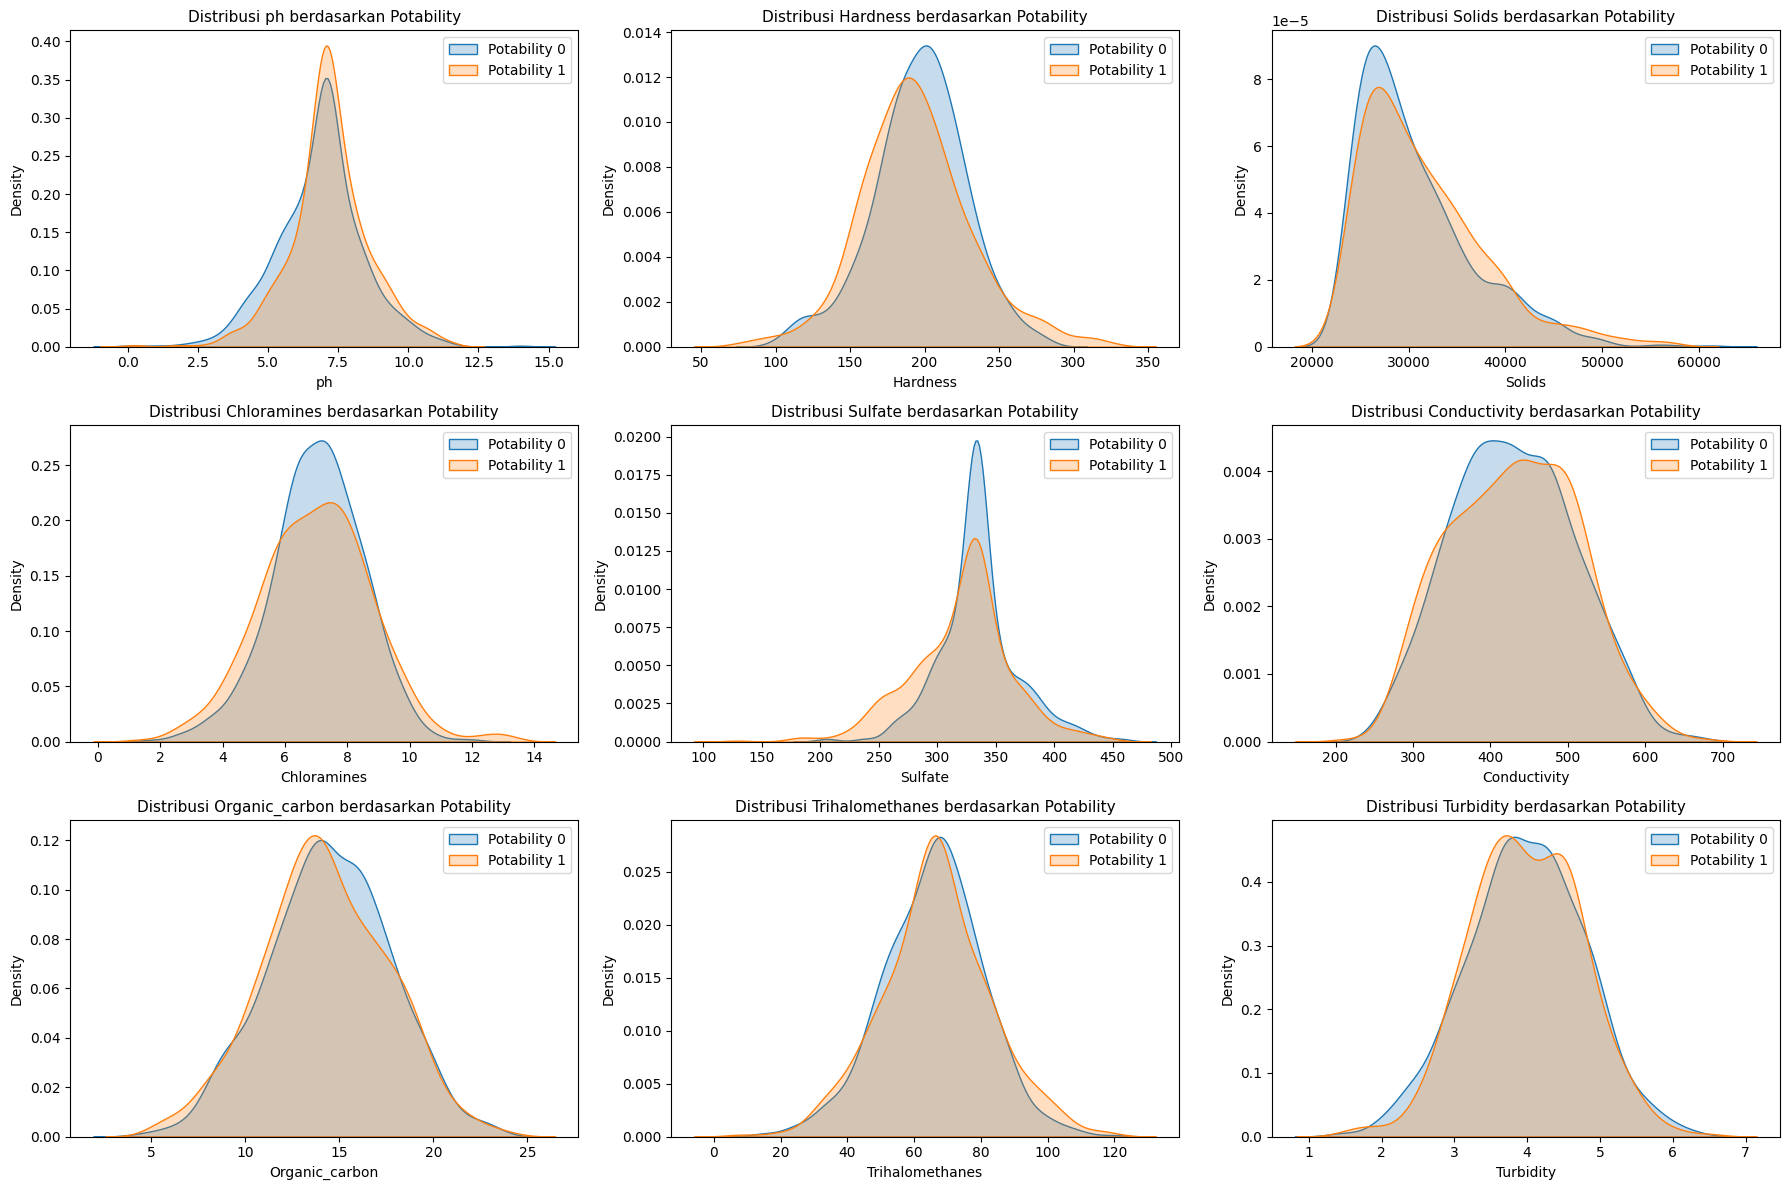

In [19]:
# Visualisasi fitur numerikal terhadap target Potability
n_cols = 3
n_rows = -(-len(numerical_features) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Plot KDE untuk masing-masing fitur numerikal
for ax, col in zip(axes, numerical_features):
    sns.kdeplot(data=df[df['Potability'] == 0], x=col, label='Potability 0', fill=True, ax=ax)
    sns.kdeplot(data=df[df['Potability'] == 1], x=col, label='Potability 1', fill=True, ax=ax)

    ax.set_title(f'Distribusi {col} berdasarkan Potability', fontsize=11)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend()

# Hapus subplot kosong jika ada
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **2. Data Preparation**

Data Preparation adalah proses menyiapkan data agar siap digunakan oleh algoritma machine learning. Ini mencakup pembersihan data, imputasi nilai yang hilang, transformasi fitur, normalisasi, encoding data kategorikal, dan pembagian data menjadi set pelatihan dan pengujian. Tahap ini penting untuk meningkatkan kualitas dan performa model yang akan dibangun.

Pada tahap ini kita akan melakukan dua tahap persiapan data, yaitu:
- Standardisasi
- Pembagian dataset dengan fungsi train_test_split

### 2.1 Standarisasi

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Pada tahap ini kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [20]:
# Memisahkan fitur dan target
X = df.drop(['Potability'],axis=1)
y = df['Potability']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2.2 Pembagian dataset dengan fungsi train_test_split

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Kita perlu mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru

Pada project kali ini, kita akan melakukan Pembagian Data dengan ratio **70% untuk data latih** dan **30% untuk data uji**

In [21]:
# Split data dengan ratio 70% train dan 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Melihat total pembagian dataset
print(f'Total datasets: {len(X)}')
print(f'Total data Latih: {len(X_train)}')
print(f'Total data Uji: {len(X_test)}')

Total datasets: 1248
Total data Latih: 873
Total data Uji: 375


## **3. Model Development**

Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding. Proses ini biasanya melibatkan percobaan dengan beberapa algoritma, pengaturan hyperparameter, dan pelatihan model menggunakan data yang telah disiapkan. Tujuan akhirnya adalah memilih model yang memberikan hasil terbaik berdasarkan evaluasi metrik tertentu.

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

- Decission Tree Classifier
- Random Forest
- XGBoost

### 3.1 Decission Tree Classifer

Decision Tree Classifier adalah salah satu algoritma supervised learning yang digunakan untuk tugas klasifikasi maupun regresi. Sesuai namanya, model ini membentuk struktur seperti pohon (tree structure), di mana setiap node mewakili fitur, cabang mewakili keputusan (rule), dan daun (leaf node) mewakili label akhir (kelas).

In [22]:
# Model Development menggunakan Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 3.2 Random Forest

Random Forest adalah algoritma ensemble learning berbasis pohon keputusan (decision trees) yang menggabungkan banyak pohon acak (random trees) untuk menghasilkan prediksi yang lebih kuat, stabil, dan akurat.

In [23]:
# Model Development menggunakan Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3.3 XGBoost (Extreme Gradient Boosting)
XGBoost adalah versi efisien dan cepat dari algoritma Gradient Boosting Decision Trees (GBDT), yang membangun pohon keputusan secara berurutan dan mengurangi error dari model sebelumnya.

In [24]:
# Model Development menggunakan XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## **4. Evaluation**

Evaluation adalah tahap untuk mengukur performa model yang telah dibangun. Evaluasi dilakukan menggunakan data pengujian dan metrik seperti akurasi, precision, recall, dan F1-score. Tujuannya adalah memastikan bahwa model tidak overfitting atau underfitting, serta cukup andal untuk digunakan dalam skenario nyata.

In [25]:
# Fungsi untuk mengevaluasi model berupa akurasi, precision, recall, dan F1-score
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Evaluasi Model: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 4.1 Evaluation Decission Tree Classifier

Evaluasi Model: Decission Tree Classifier
Accuracy: 0.928
Precision: 0.9294871794871795
Recall: 0.9006211180124224
F1 Score: 0.9148264984227129
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       214
           1       0.93      0.90      0.91       161

    accuracy                           0.93       375
   macro avg       0.93      0.92      0.93       375
weighted avg       0.93      0.93      0.93       375



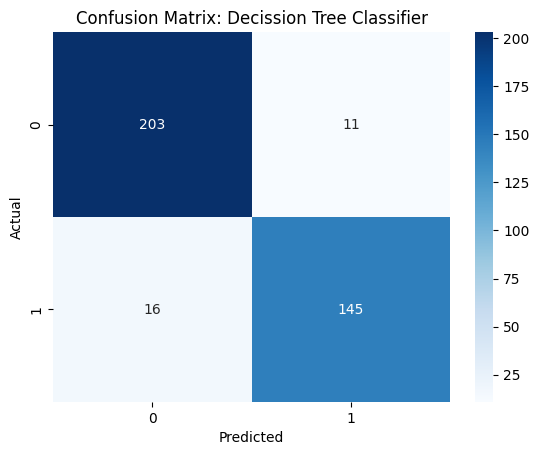

In [26]:
# Melatih data uji Decission Tree Classifier
y_pred_dt = dt_model.predict(X_test)

# Mengevaluasi performa model Decission Tree Classifier
evaluate_model(y_test, y_pred_dt, "Decission Tree Classifier")

Model Decision Tree Classifier menunjukkan performa yang sangat baik dalam melakukan klasifikasi. Model ini mencapai accuracy sebesar 92.8%, yang berarti sebagian besar prediksi yang dihasilkan sudah tepat. Dengan precision sebesar 92.95%, model memiliki kemampuan yang tinggi dalam memberikan prediksi yang benar untuk kelas air layak minum. Recall sebesar 90.06% menunjukkan bahwa model mampu mengenali sebagian besar data air yang benar-benar layak. Hal ini menghasilkan F1 Score sebesar 91.48%, yang menunjukkan keseimbangan yang solid antara ketepatan dan cakupan prediksi.

### 4.2 Evaluation Random Forest

Evaluasi Model: Random Forest
Accuracy: 0.792
Precision: 0.8487394957983193
Recall: 0.6273291925465838
F1 Score: 0.7214285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.83       214
           1       0.85      0.63      0.72       161

    accuracy                           0.79       375
   macro avg       0.81      0.77      0.78       375
weighted avg       0.80      0.79      0.79       375



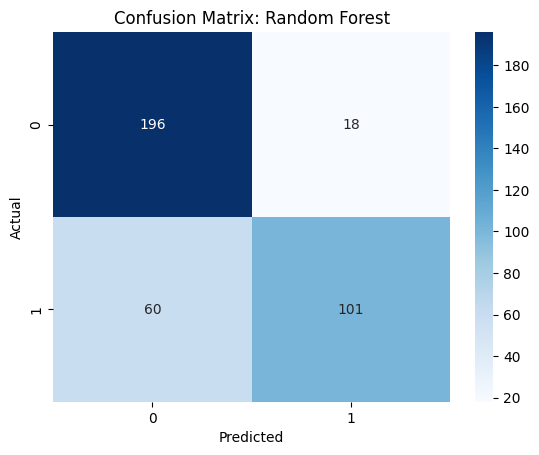

In [27]:
# Melatih data uji menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Mengevaluasi performa model Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

Model Random Forest menunjukkan performa yang cukup baik namun belum optimal. Model ini menghasilkan accuracy sebesar 79.2%, yang berarti sebagian besar prediksi sudah benar, namun masih terdapat cukup banyak kesalahan. Dengan precision sebesar 84.87%, model cukup baik dalam memastikan bahwa prediksi air layak minum memang benar. Namun, recall-nya hanya 62.73%, menandakan bahwa masih banyak data air yang benar-benar layak minum tidak berhasil terdeteksi oleh model. Hal ini menyebabkan F1 Score sebesar 72.14%, yang menunjukkan bahwa keseimbangan antara precision dan recall belum ideal.

### 4.3 Evaluation XGBoost

Evaluasi Model: XGBoost
Accuracy: 0.9733333333333334
Precision: 0.9808917197452229
Recall: 0.9565217391304348
F1 Score: 0.9685534591194969
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       214
           1       0.98      0.96      0.97       161

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375



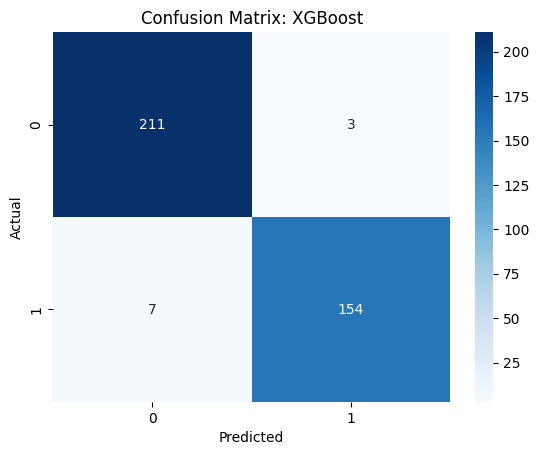

In [28]:
# Melatih data uji menggunakan XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Mengevaluasi performa model XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Model XGBoost menunjukkan performa yang sangat baik. Model ini berhasil mencapai accuracy sebesar 97.33%, yang menandakan bahwa sebagian besar prediksi pada data uji sudah tepat. Selain itu, model mencatat precision sebesar 98.09%, artinya prediksi air layak minum sangat jarang salah. Recall-nya sebesar 95.65%, menunjukkan kemampuan model dalam mengenali hampir semua data air yang benar-benar layak minum. Kombinasi ini menghasilkan F1 Score sebesar 96.85%, mencerminkan keseimbangan yang sangat baik antara ketepatan dan kelengkapan prediksi.

### 4.4 Kesimpulan

Berdasarkan hasil evaluasi terhadap tiga model yang diuji, dapat disimpulkan bahwa model XGBoost memberikan performa terbaik di antara semuanya. Dengan akurasi mencapai 97.3%, serta nilai precision sebesar 98.09%, recall 95.65%, dan F1-Score 96.85%, model ini menunjukkan kemampuan yang sangat baik dalam mengklasifikasikan data secara akurat dan seimbang.

Sementara itu, Decision Tree Classifier juga menunjukkan performa yang cukup baik dengan akurasi 92.8%, namun masih berada di bawah XGBoost. Sedangkan Random Forest berada di posisi ketiga dengan akurasi 79.2%, dan mengalami penurunan performa khususnya pada nilai recall untuk kelas minoritas.

Dengan mempertimbangkan seluruh metrik evaluasi, model XGBoost menjadi pilihan terbaik untuk digunakan dalam prediksi tingkat kelayakan air minum pada dataset ini, karena mampu menangkap pola data secara optimal dan memberikan hasil yang sangat memuaskan.